In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

**Data Loading And Exploration**

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


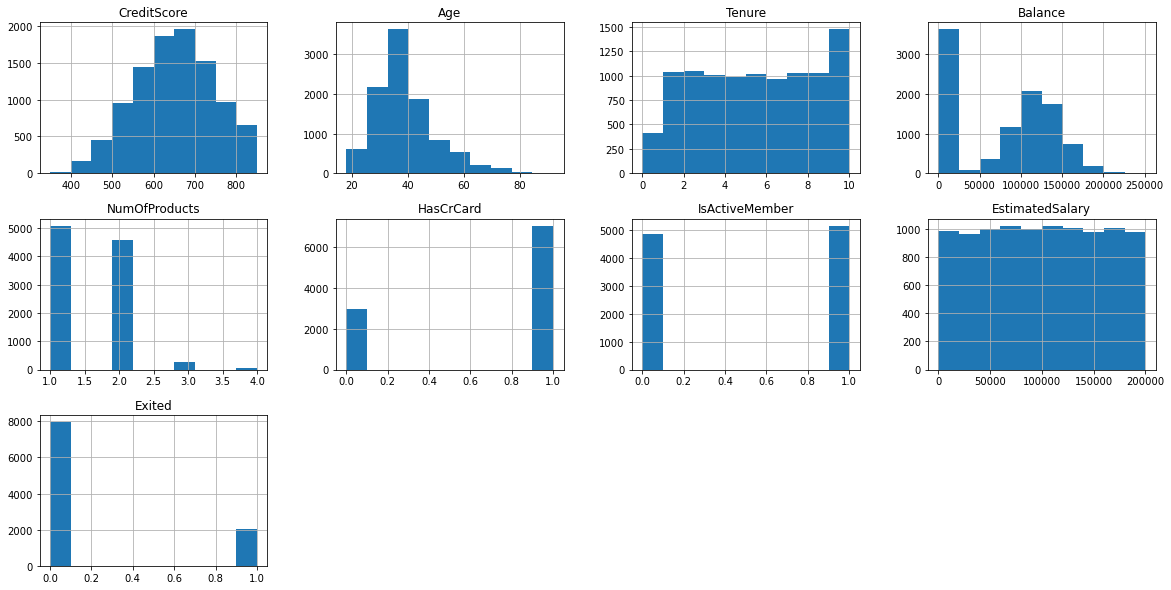

In [5]:
df.drop(['RowNumber', 'CustomerId'], axis = 1).hist(figsize = (20,10), layout = (3, 4))
plt.show()

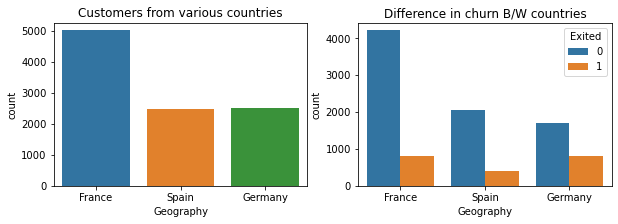

In [6]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
sns.countplot('Geography', data = df, ax = ax1)
ax1.set_title('Customers from various countries')
sns.countplot('Geography', data = df, hue = 'Exited', ax=ax2)
ax2.set_title('Difference in churn B/W countries')
plt.show()
# Less number of people are engaged with the bank from Germany , and Germany has the maximum churn rate.
# Spain has the least churn rate
# France has the maximum number of people associated with the bank

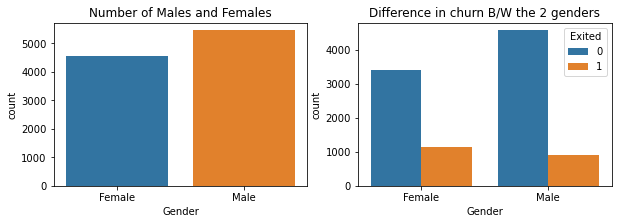

In [7]:
fig , (ax1, ax2) = plt.subplots(1 , 2 , figsize = (10, 3))
sns.countplot('Gender', data = df, ax = ax1)
ax1.set_title('Number of Males and Females')
ax2.set_title('Difference in churn B/W the 2 genders')
sns.countplot('Gender', data = df, ax = ax2, hue = 'Exited')
plt.show()
# Female churn rate is higher

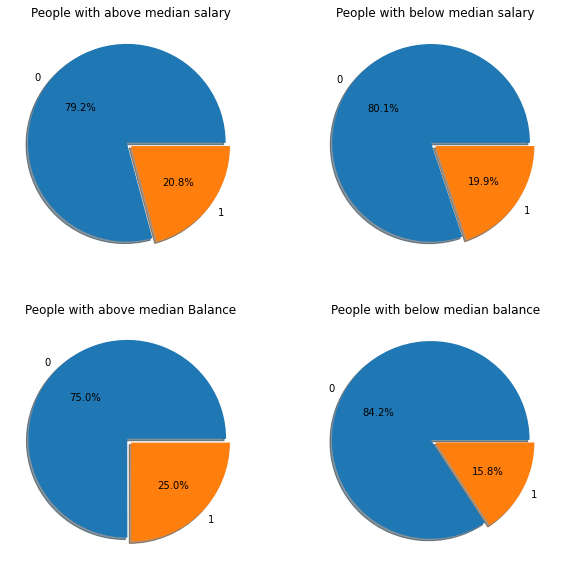

In [8]:
median = df[['EstimatedSalary', 'Balance']].median()
medianSalary = median[0]
medianBalance = median[1]

labels = [0, 1]
aboveMedSal = df[df['EstimatedSalary'] >= medianSalary]['Exited'].value_counts().to_list()
belowMedSal = df[df['EstimatedSalary'] < medianSalary]['Exited'].value_counts().to_list()
aboveMedBal = df[df['Balance'] >= medianBalance]['Exited'].value_counts().to_list()
belowMedBal = df[df['Balance'] < medianBalance]['Exited'].value_counts().to_list()

fig , ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize = (10,10))

ax1.pie(aboveMedSal, labels = labels, explode = [.05,.005], shadow = True, autopct = '%1.1f%%')
ax1.set_title('People with above median salary')

ax2.pie(belowMedSal, labels = labels, explode = [.05,.005], shadow = True, autopct = '%1.1f%%')
ax2.set_title('People with below median salary')

# No real difference between churn rates here

ax3.pie(aboveMedBal, labels = labels, explode = [.05,.005], shadow = True, autopct = '%1.1f%%')
ax3.set_title('People with above median Balance')

ax4.pie(belowMedBal, labels = labels, explode = [.05,.005], shadow = True, autopct = '%1.1f%%')
ax4.set_title('People with below median balance')
plt.show()

# We can see that people above median balance have a higher churn rate than people with below median balance


**Data Preprocessing**

In [9]:
from sklearn.preprocessing import LabelEncoder
df["Gender"] = df["Gender"].replace({"Female" : 0, "Male" : 1})

In [10]:
oneHotEncoded = pd.get_dummies(df[['Geography']], drop_first = True)

df = pd.concat((df, oneHotEncoded), axis = 1)

In [11]:
df = df.drop('Geography', axis = 1)

In [12]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
X = df.iloc[:, 3:].drop('Exited', axis = 1).values
y = df['Exited'].values

**Splitting the data into test and training set**

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

**Artificial Neural Network**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
ann = Sequential() # Initialize Sequential Model
ann.add(Dense(units = 6, activation = "relu")) # Add layer using add function from sequential, The layers are made from a different class called Dense class
ann.add(Dense(units = 3, activation = "relu")) # Layer 2
ann.add(Dense(units = 1, activation = "sigmoid")) # Output layer


In [18]:
ann.layers

In [19]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
ann.fit(Xtrain, ytrain, batch_size = 50, epochs = 50)

Epoch 1/50
160/160 [==============================] - 2s 3ms/step - loss: 0.5418 - accuracy: 0.7689
Epoch 2/50
160/160 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7950
Epoch 3/50
160/160 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.7947
Epoch 4/50
160/160 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.7962
Epoch 5/50
160/160 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.7995
Epoch 6/50
160/160 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8041
Epoch 7/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4184 - accuracy: 0.8079
Epoch 8/50
160/160 [==============================] - 1s 4ms/step - loss: 0.4091 - accuracy: 0.8116
Epoch 9/50
160/160 [==============================] - 1s 3ms/step - loss: 0.4008 - accuracy: 0.8146
Epoch 10/50
160/160 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8179

In [21]:
ann.predict(sc.transform(
    [[600, 40, 1, 3, 60000, 2, 1, 1, 50000, 0, 0]])) # Prediction should be done with the same scaling as training set
# result will show the probabilty of the customer leaving.

array([[9.869501e-27]], dtype=float32)

In [22]:
ann.predict(sc.transform(
    [[600, 40, 1, 3, 60000, 2, 1, 1, 50000, 0, 0]])) > 0.5 # Added Threshold

array([[False]])

**Testing**

In [23]:
yhat = ann.predict(Xtest)
yhat = (yhat > 0.5)

In [24]:
ypred = []
for x in yhat:
    if x[0] == False:
        ypred.append([0])
    else:
        ypred.append([1])
ypred = np.array(ypred)

In [25]:
np.concatenate((ypred.reshape(len(ypred), 1), ytest.reshape(len(ytest), 1)), 1) # yhat, y_actual

array([[0, 0],
       [0, 0],
       [1, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1606
           1       0.76      0.46      0.57       394

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.86      0.85      2000

[[1550   56]
 [ 214  180]]


In [27]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
